------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [94]:
df=pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\statical analysis\\auto-mpg.csv')


In [95]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [96]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [97]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Okay, I think all columns are good but horsepower should be numeric
and origin should be categorical

In [98]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors = "coerce")
df["origin"] = df["origin"].astype("object")

In [99]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [100]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [101]:
filter=df['horsepower'].isna()
df[filter]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


We have 6 null valus in horsepower.
I will impute them with the median

In [102]:
horse_pwr_median = df["horsepower"].median()
df["horsepower"].fillna(horse_pwr_median, inplace = True)

In [103]:
df.isna().sum().sum()

0

In [104]:
num_df = df.select_dtypes(exclude='O')
num_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


let's see how many outliers are in every column

In [105]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filt = ((num_df < (lower_bound)) | (num_df > (upper_bound)))
filt.sum()

mpg              1
cylinders        0
displacement     0
horsepower      11
weight           0
acceleration     7
model year       0
dtype: int64

In [106]:
df.loc[filt["acceleration"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71.0,3190,24.8,79,2,peugeot 504
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup


In [107]:
df.loc[filt["horsepower"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom


In [108]:
df.loc[filt["mpg"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


Those outliers aren't abnormal and i think it's natural thing to have them 
I will keep them

In [109]:
df.describe(include = "O")

,origin,car name
count,398,398
unique,3,305
top,1,ford pinto
freq,249,6


In [110]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


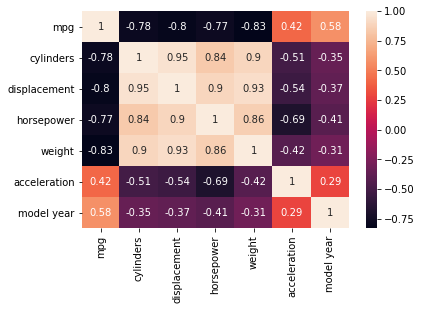

In [111]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* There are strong Positive correlations between weight , horsepower, displacement, cylindrers.
This makes sense, because for example the more cylinders the car have the more horsepower.

* There are strong Negative correlations between mpg and each of the following
weight, horsepower, displacement, cylindrers
This is reasonable, becauser when the car is more powerful it requires more gallons.

In [112]:
df['car type'] = df['car name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car type
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford ranger


In [113]:
df['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [114]:
x= re.sub(r'\bv\w+' , 'VW' , str(df['car name']))
print(x)


0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    VW pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object


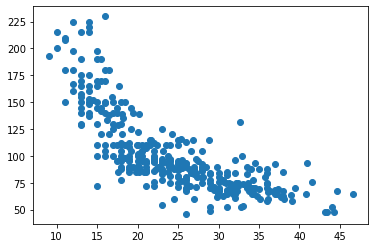

In [115]:
temp=df.groupby(['mpg','horsepower']).size().rename("count").reset_index()
plt.scatter(temp['mpg'],temp['horsepower'])
plt.show()

-----